In [1]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import statsmodels.api as sm

X = pd.read_pickle("/home/maksim/Documents/data_Art_13")

In [5]:
X.head()

,Author,Art,салатовый,зеленый,бирюзовый,синий,темно-синий,фиолетовый,розовый,красный,...,sum_yellow,sum_orange,sum_red,sum_purple,X_contrst_triad,X_classic_triad,X_rectangle,X_analog_triad,X_quad,X_comp
0,alberto giacometti,ANNETTE OR PORTRAIT D'ANNETTE AU PULL-OVER ROUGE,0.017135,0.888785,0.000115,0.0,0.000000,0.078145,0.000440,0.0,...,0.464635,0.092556,0.008839,0.109037,0,0,0,0,0,0
1,alberto giacometti,ATELIER I,0.000137,0.929549,0.000030,0.0,0.000000,0.048128,0.000407,0.0,...,0.401260,0.351957,0.052975,0.134582,0,1,0,0,0,0
2,alberto giacometti,BUSTE,0.000065,0.988809,0.000000,0.0,0.000000,0.011126,0.000000,0.0,...,0.389238,0.295750,0.000000,0.000032,0,0,0,0,0,0
3,alberto giacometti,BUSTE,0.000492,0.827368,0.168795,0.0,0.000003,0.001778,0.000000,0.0,...,0.100613,0.003902,0.000018,0.531011,0,0,0,0,0,0
4,alberto giacometti,BUSTE D'HOMME OR TÊTE D'HOMME - RECTO TÊTE D'H...,0.002216,0.991054,0.003320,0.0,0.000000,0.003409,0.000000,0.0,...,0.612331,0.001289,0.000008,0.006939,0,0,0,0,0,0


In [6]:
X.columns

Index(['Author', 'Art', 'салатовый', 'зеленый', 'бирюзовый', 'синий',
       'темно-синий', 'фиолетовый', 'розовый', 'красный', 'ярко-оранжевый',
       'оранжевый', 'ярко-желтый', 'желтый', 'lines_variance', 'Technique',
       'Material', 'style', 'Nazi', 'Sign', 'Framed', 'square_m',
       'ExhibitedNum', 'ProvenanceNum', 'LiteratureNum', 'sex',
       'date_of_birth', 'hasFollowers', 'hasAfter', 'isUntitled', 'Paths',
       'normalized_price', 'var_h', 'mean_s', 'mean_v', 'Синий брахат',
       'Темно-синий', 'Синий', 'Голубой', 'Синий-пастель',
       'Синий-белый-пастель', 'Зеленый бархат', 'Трава', 'Зеленый',
       'Салатовый', 'Зеленый-пастель', 'Зеленый-белый-пастель', 'Хаки',
       'Оливка', 'Желтый', 'Светло-желтый', 'Желтый-пастель',
       'Желтый-белый-пастель', 'Коричнего-рыжий кирпич', 'Рыжий-ржавчина',
       'Оранжевый', 'Яркий персик', 'Оранжевый-пастель',
       'Оранжевый-белый-пастель', 'Красный бархат', 'Бордо', 'Красный',
       'Розовый', 'Красный-пастель',

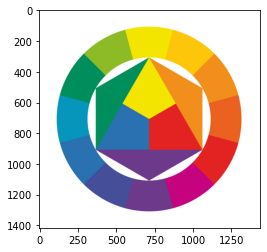

In [12]:
path = "/home/maksim/Documents/itten.jpg"
image = cv2.imread(path)[:,:,::-1]
plt.imshow(image)
plt.show()

itten_colors = [
    image[300][510], image[400][300], image[700][250], image[1000][250], image[1200][500], image[1200][750],
image[1100][1000], image[1000][1100], image[750][1200], image[500][1200], image[300][900], image[300][700]
]

itten_colors_luv = cv2.cvtColor(np.array([itten_colors], 'float32') / 255, cv2.COLOR_RGB2Luv).reshape(-1,3)

In [167]:
from sklearn.metrics.pairwise import euclidean_distances

def get_image(i):
    return cv2.imread(X.Paths[i])
def get_pixel(i, j, num):
    return np.array([[get_image(num)[i][j]]])



def get_image_colors(image_index):
    luv_img = cv2.cvtColor(np.array(get_image(image_index), 'float32')/255, cv2.COLOR_BGR2LUV)
    euclid_dist = euclidean_distances(luv_img.reshape(-1,3), itten_colors_luv)
    closest_colors = np.argmin(euclid_dist, axis=1)
    indexes_closest_colors, count_closest_colors = np.unique(closest_colors, return_counts=True)
    freq_closest_colors = count_closest_colors / count_closest_colors.sum()
    
    
    index_freq_colors = list(zip(indexes_closest_colors, freq_closest_colors))
    for i in range(12):
        if i not  in indexes_closest_colors:
            index_freq_colors.insert(i, (i,0))
            
            
            
    errors = np.array([0 for i in range(12)])
    
    for i in range(len(euclid_dist)):
        dist_from_actual_to_closest_in_luv = euclid_dist[i][closest_colors[i]]
        errors[closest_colors[i]] += dist_from_actual_to_closest_in_luv
    
    
    j = 0
    for i in range(12):
        if errors[i] != 0:
            errors[i] = errors[i] / count_closest_colors[j]
            j += 1
    return np.concatenate([np.array(index_freq_colors)[:,1], np.array(errors)])


In [180]:
itten_data = pd.DataFrame([get_image_colors(0)], columns=['салатовый', 'зеленый', 'бирюзовый', 'синий',
       'темно-синий', 'фиолетовый', 'розовый', 'красный', 'ярко-оранжевый',
       'оранжевый', 'ярко-желтый', 'желтый','dist_салатовый', 'dist_зеленый', 'dist_бирюзовый', 'dist_синий',
       'dist_темно-синий', 'dist_фиолетовый', 'dist_розовый', 'dist_красный', 'dist_ярко-оранжевый',
       'dist_оранжевый', 'dist_ярко-желтый', 'dist_желтый'])

In [181]:
for i in range(1, len(X)):
    itten_data.loc[i] = get_image_colors(i)

In [182]:
itten_data

,салатовый,зеленый,бирюзовый,синий,темно-синий,фиолетовый,розовый,красный,ярко-оранжевый,оранжевый,...,dist_бирюзовый,dist_синий,dist_темно-синий,dist_фиолетовый,dist_розовый,dist_красный,dist_ярко-оранжевый,dist_оранжевый,dist_ярко-желтый,dist_желтый
0,0.017135,0.888785,0.000115,0.000000,0.000000,0.078145,0.000440,0.000000,0.000000,0.009088,...,70.0,0.0,0.0,61.0,66.0,0.0,0.0,66.0,55.0,0.0
1,0.000137,0.929549,0.000030,0.000000,0.000000,0.048128,0.000407,0.000000,0.000000,0.016693,...,51.0,0.0,0.0,63.0,62.0,0.0,0.0,67.0,66.0,0.0
2,0.000065,0.988809,0.000000,0.000000,0.000000,0.011126,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,63.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000492,0.827368,0.168795,0.000000,0.000003,0.001778,0.000000,0.000000,0.000000,0.000001,...,51.0,0.0,48.0,56.0,0.0,0.0,0.0,69.0,61.0,0.0
4,0.002216,0.991054,0.003320,0.000000,0.000000,0.003409,0.000000,0.000000,0.000000,0.000000,...,70.0,0.0,0.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9205,0.000000,0.949844,0.044616,0.000000,0.000000,0.005210,0.000001,0.000000,0.000000,0.000286,...,58.0,0.0,0.0,57.0,70.0,0.0,0.0,67.0,71.0,0.0
9206,0.192265,0.185236,0.398131,0.000000,0.000021,0.002436,0.000017,0.000000,0.000000,0.002538,...,46.0,0.0,45.0,50.0,69.0,0.0,0.0,47.0,32.0,21.0
9207,0.107679,0.299204,0.044894,0.001264,0.005859,0.015461,0.020856,0.004731,0.038209,0.033444,...,39.0,20.0,38.0,67.0,58.0,30.0,36.0,48.0,43.0,25.0
9208,0.006844,0.062779,0.569470,0.000000,0.000000,0.094935,0.000000,0.000000,0.000000,0.002554,...,55.0,0.0,0.0,57.0,0.0,0.0,0.0,62.0,16.0,7.0


In [184]:
X.columns

Index(['Author', 'Art', 'салатовый', 'зеленый', 'бирюзовый', 'синий',
       'темно-синий', 'фиолетовый', 'розовый', 'красный', 'ярко-оранжевый',
       'оранжевый', 'ярко-желтый', 'желтый', 'lines_variance', 'Technique',
       'Material', 'style', 'Nazi', 'Sign', 'Framed', 'square_m',
       'ExhibitedNum', 'ProvenanceNum', 'LiteratureNum', 'sex',
       'date_of_birth', 'hasFollowers', 'hasAfter', 'isUntitled', 'Paths',
       'normalized_price', 'var_h', 'mean_s', 'mean_v', 'Синий брахат',
       'Темно-синий', 'Синий', 'Голубой', 'Синий-пастель',
       'Синий-белый-пастель', 'Зеленый бархат', 'Трава', 'Зеленый',
       'Салатовый', 'Зеленый-пастель', 'Зеленый-белый-пастель', 'Хаки',
       'Оливка', 'Желтый', 'Светло-желтый', 'Желтый-пастель',
       'Желтый-белый-пастель', 'Коричнего-рыжий кирпич', 'Рыжий-ржавчина',
       'Оранжевый', 'Яркий персик', 'Оранжевый-пастель',
       'Оранжевый-белый-пастель', 'Красный бархат', 'Бордо', 'Красный',
       'Розовый', 'Красный-пастель',

In [1]:
import pickle

pd.to_pickle(X[['Author', 'Art','lines_variance', 'Technique',
       'Material', 'style', 'Nazi', 'Sign', 'Framed', 'square_m',
       'ExhibitedNum', 'ProvenanceNum', 'LiteratureNum', 'sex',
       'date_of_birth', 'hasFollowers', 'hasAfter', 'isUntitled', 'Paths',
       'normalized_price', 'var_h', 'mean_s', 'mean_v', 'X_contrst_triad',
       'X_classic_triad', 'X_rectangle', 'X_analog_triad', 'X_quad', 'X_comp']].join(itten_data), 'data_Art_01')

NameError: name 'pd' is not defined

In [2]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pickle


X = pd.read_pickle('data_Art_01')

In [20]:
np.unique(X['style'].values)

array(['abstract expressionism', 'abstractionism', 'academicism',
       'baroque', 'classicism', 'conceptualism', 'contemporary art',
       'cubism', 'dadaism', 'expressionism', 'fauvism', 'futurism',
       'impressionism', 'installation', 'magical realism', 'mannerism',
       'metaphysical art', 'minimalism', 'modern', 'modernism', 'nabism',
       'neo-expressionism', 'neo-impressionism', 'neo-pop / post-pop',
       'neoclassicism', 'organic abstraction', 'pop-art',
       'post-impressionism', 'postconceptualism', 'pre-raphaelitism',
       'realism', 'renaissance', 'rococo', 'romanica', 'romanticism',
       'surrealism', 'symbolism', 'traditional chinese painting'],
      dtype=object)

****Color complexity measure****

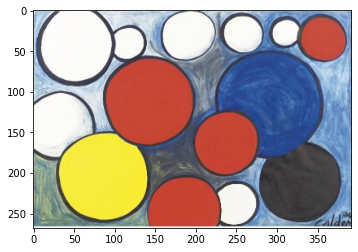

In [71]:
image = cv2.imread(X.Paths[143])
plt.imshow(image[:,:,::-1])
plt.show()

In [596]:
N = 3


def get_image(i):
    return cv2.imread(X.Paths[i])

def get_pixel(i, j, num):
    return get_image(num)[i][j]


def get_luv_image(num_image):
    return cv2.cvtColor(np.array(get_image(num_image), 'float32')/255, cv2.COLOR_BGR2LUV)

def plot_window(num_image, i, j):
    cur_window = get_image(num_image)[i-N:i+N,j-N:j+N, :: -1]
    plt.imshow(cur_window)
    plt.show()
    
def plot_image(num_image):
    plt.imshow(get_image(num_image)[:,:,::-1])
    plt.show()
    

In [362]:


def gauss(x, a, b, c):
    return a*np.exp(-(x - b)**2 / (2*(c**2)))


def color_diff_measure(pix_1, pix_2, gamma):
    euclid_dist = np.linalg.norm(pix_1 - pix_2)
    return 1 - np.exp(-euclid_dist/gamma)
    
def CCM_pixel(i, j, cur_image):
    c_average = np.array([0.,0.,0.])
    for x in range(i - N, i + N):
        for y in range(j - N, j + N):
            c_average += cur_image[x][y]
    c_average = c_average/ ((2*N) ** 2)
    
    psi = 0
    for x in range(i - N, i + N):
        for y in range(j - N, j + N):
            psi += gauss(color_diff_measure(cur_image[x][y], c_average, 20), 10, 3.7, 1)
    return np.round(psi,4)

def CCM_image(num_image):
    cur_image = get_luv_image(num_image)
    length, width, _ = np.shape(cur_image)
    average_CCM = 0
    total = 0
    for x in range(N, length - N, 2*N):
        for y in range(N, width - N, 2*N):
            total += 1
            average_CCM += CCM_pixel(x, y, cur_image)
    return average_CCM/(total)

13.762112614578786


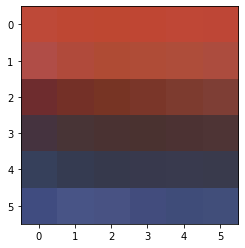

6.3058


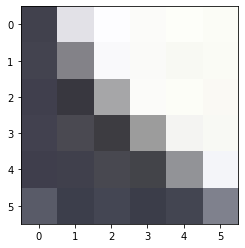

5.1


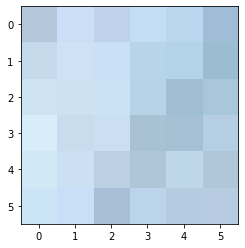

0.9198


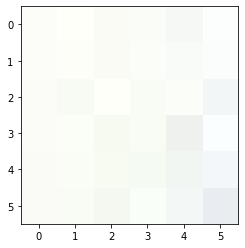

0.5905


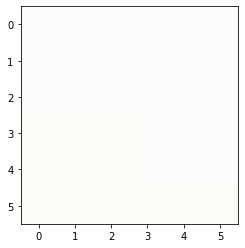

0.4582


In [363]:
cur_img = get_luv_image(143)

print(CCM_pixel(166, 140, cur_img)/ CCM_pixel(70, 70, cur_img))

plot_window(143, 166, 140)
print(CCM_pixel(166, 140, cur_img))

plot_window(143, 55, 102)
print(CCM_pixel(55, 102, cur_img))
plot_window(143, 10, 10)
print(CCM_pixel(10, 10, cur_img))

plot_window(143, 55, 90)
print(CCM_pixel(55, 90, cur_img))

plot_window(143, 70, 70)
print(CCM_pixel(70, 70, cur_img))




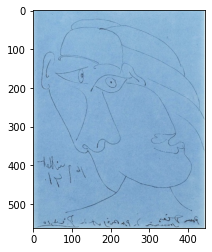

0.6545


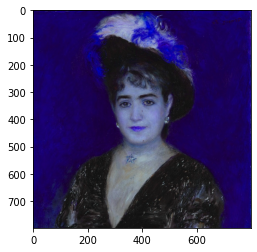

0.7212


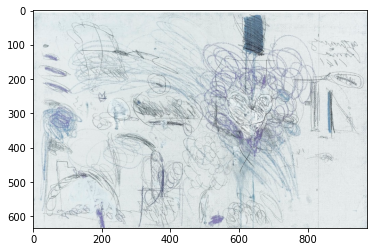

0.8514


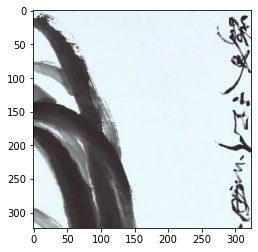

0.8569


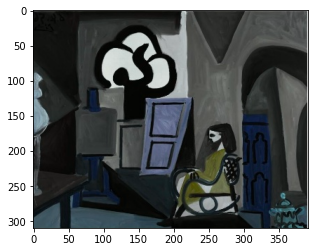

1.0396


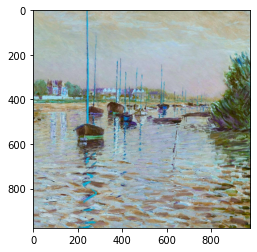

1.1664


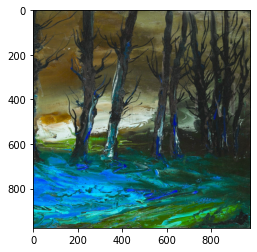

1.1818


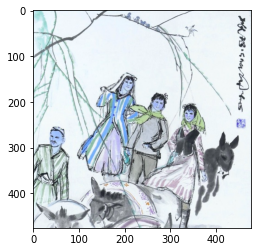

1.2637


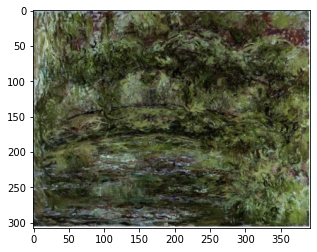

1.3111


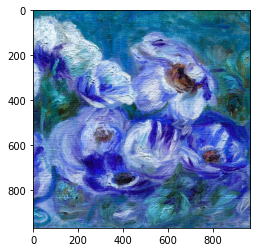

1.4425
CPU times: user 57.1 s, sys: 75.7 ms, total: 57.2 s
Wall time: 57.4 s


In [364]:
%%time
ccm_paintings = []
for i in np.random.choice(7000,10):
    ccm_paintings.append((CCM_image(i),i))

ccm_paintings = sorted(ccm_paintings, key=lambda x: x[0])

for x in ccm_paintings:
    plot_image(x[1])
    print(np.round(x[0],4))


***Точки интереса***

In [562]:
n = 4
r = 4
def get_gray_level(pixel):
    return 0.299*pixel[0] + 0.587 *pixel[1] + 0.114*pixel[2]


def circle(n,i,j):
    if n == 1:
        return [(i+1,j),(i+1,j+1),(i+1,j-1), (i,j+1), (i,j-1), (i-1,j),(i-1,j+1),(i-1,j-1)]
    cur = circle(n-1, i, j)
    new = []
    for x in cur:
        if x[0] < i:
            new.append((x[0]-1,x[1]))
        else:
            new.append((x[0]+1,x[1]))
        if x[1] < j:
            new.append((x[0],x[1]-1))
        else:
            new.append((x[0],x[1]+1))

    return list(set([x for x in new if x not in cur]))




def E(i,j, image):
    E = 0
    for x in circle(r, i, j):
        for y in circle(r + 1, i, j):
            if (x[0] - y[0]) ** 2 + (x[1] - y[1]) ** 2 == 1:
                E += np.abs(get_gray_level(image[x[0]][x[1]]) - get_gray_level(image[y[0]][y[1]]))
    return E

def T(i, j, k, image):
    T = 0
    for pixel in circle(r, i, j):
        x = pixel[0]
        y = pixel[1]
        T += np.abs((x - i)*np.sin(np.pi*k/n) - (y - j)*np.cos(np.pi*k/n))*get_gray_level(image[x][y])
    return T

def DST_pixel(i,j, image):
    sum_T = 0
    sum_T_2 = 0
    for k in range(n):
        sum_T += T(i, j, k, image)
        sum_T_2 += T(i, j, k, image) ** 2
        
    return E(i,j, image) * (1 - np.sqrt(sum_T_2/n - (sum_T/n) ** 2))

def DST_image(image):
    my_DST = np.array([])
    length, width, _ = np.shape(image)
    for i in range(r, length - r - 1, 3*r):
        for j in range(r, width - r - 1, 3*r):
            my_DST = np.append(DST_pixel(i,j, image), my_DST)
    return my_DST

In [563]:
%%time
overall_points = []
for i in np.random.choice(7000,10):
    im = get_image(i)[:,:,::-1]
    my_DST = DST_image(im)
    num_points = 0
    all_pixels = 0
    for dst in my_DST:
        all_pixels += 1
        if dst > 3*np.mean(my_DST) + np.std(my_DST):
            num_points += 1
    overall_points.append((num_points, i, 100*num_points/all_pixels))

CPU times: user 3min 6s, sys: 55.6 ms, total: 3min 6s
Wall time: 3min 6s


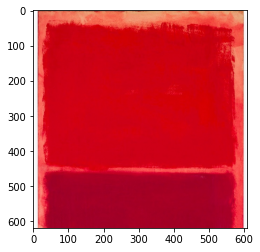

Процент точек интереса в картине:  0.0


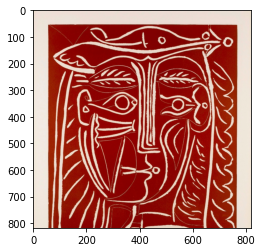

Процент точек интереса в картине:  74.35


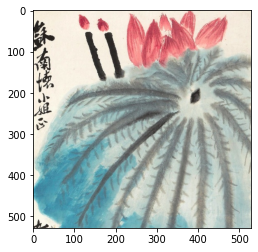

Процент точек интереса в картине:  80.58


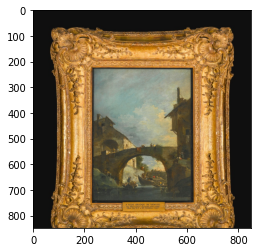

Процент точек интереса в картине:  81.35


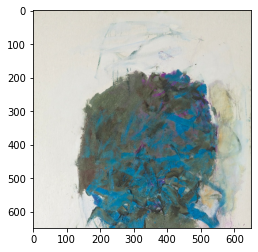

Процент точек интереса в картине:  91.91


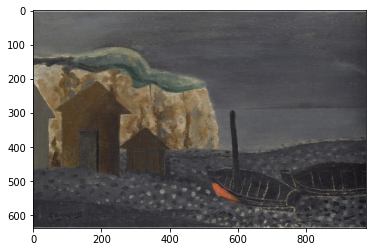

Процент точек интереса в картине:  92.1


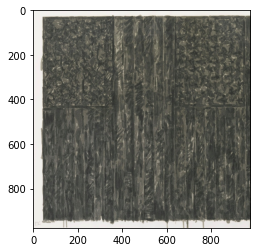

Процент точек интереса в картине:  93.14


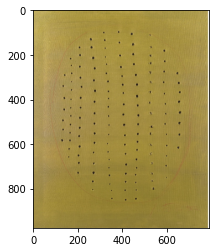

Процент точек интереса в картине:  95.14


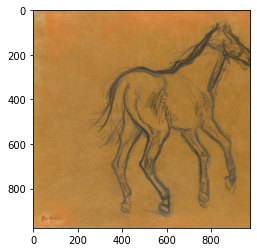

Процент точек интереса в картине:  98.52


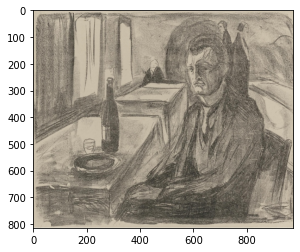

Процент точек интереса в картине:  98.93


In [564]:
sorted_points = sorted(overall_points, key=lambda x: x[2])

for i in range(len(sorted_points)):
    im = get_image(sorted_points[i][1])[:,:,::-1]
    plt.imshow(im)
    plt.show()
    
    print('Процент точек интереса в картине: ',np.round(sorted_points[i][2], 2))

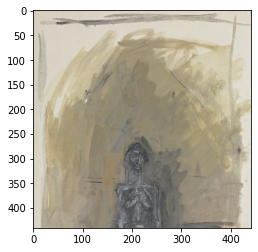

In [601]:
plot_image(12)

**Who’s Afraid of Itten?**